In [1]:
###import libraries

import gym
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from collections import deque
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [2]:
###prepare environment

env = gym.make('CartPole-v1') #create environment
env.reset() #observation of initialized environment

array([ 0.00707912,  0.0496393 , -0.00503836, -0.0053612 ])

In [ ]:
###understand environment

"""
Description:
    A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum starts upright, and the goal is to prevent it from falling over by increasing and reducing the cart's velocity.
Source:
    This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson
Observation: 
    Type: Box(4)
    Num	Observation                 Min         Max
    0	Cart Position             -4.8            4.8
    1	Cart Velocity             -Inf            Inf
    2	Pole Angle                 -24 deg        24 deg
    3	Pole Velocity At Tip      -Inf            Inf

Actions:
    Type: Discrete(2)
    Num	Action
    0	Push cart to the left
    1	Push cart to the right

    Note: The amount the velocity that is reduced or increased is not fixed; it depends on the angle the pole is pointing. This is because the center of gravity of the pole increases the amount of energy needed to move the cart underneath it
Reward:
    Reward is 1 for every step taken, including the termination step
Starting State:
    All observations are assigned a uniform random value in [-0.05..0.05]
Episode Termination:
    Pole Angle is more than 12 degrees
    Cart Position is more than 2.4 (center of the cart reaches the edge of the display)
    Episode length is greater than 200
    Solved Requirements
    Considered solved when the average reward is greater than or equal to 195.0 over 100 consecutive trials.
"""

In [3]:
###visualize environment

for episode in range(10): #run for, like, 10 episodes
    print('Episode {}\n'.format(episode+1))
    env.reset() #initialize environment
    done = False #initially, environment is not complete. the game will run until done = True (environment is complete)
    while done != True:
        env.render()
        observation, reward, done, info = env.step(env.action_space.sample()) #execute random action
        print('Observation: {}'.format(observation))
        print('Reward: {}'.format(reward))
        print('Done: {}'.format(done))
        print('Info: {}\n'.format(info))
    
    print('\n')

Episode 1

Observation: [ 0.00679617 -0.18507372 -0.03673637  0.26524885]
Reward: 1.0
Done: False
Info: {}

Observation: [ 0.00309469 -0.37965261 -0.03143139  0.54612219]
Reward: 1.0
Done: False
Info: {}

Observation: [-0.00449836 -0.57431916 -0.02050895  0.82873849]
Reward: 1.0
Done: False
Info: {}

Observation: [-0.01598474 -0.37892292 -0.00393418  0.52967655]
Reward: 1.0
Done: False
Info: {}

Observation: [-0.0235632  -0.57398931  0.00665935  0.82111722]
Reward: 1.0
Done: False
Info: {}

Observation: [-0.03504299 -0.37895911  0.0230817   0.53053625]
Reward: 1.0
Done: False
Info: {}

Observation: [-0.04262217 -0.57439801  0.03369242  0.83040193]
Reward: 1.0
Done: False
Info: {}

Observation: [-0.05411013 -0.7699639   0.05030046  1.13348797]
Reward: 1.0
Done: False
Info: {}

Observation: [-0.06950941 -0.96570678  0.07297022  1.44151304]
Reward: 1.0
Done: False
Info: {}

Observation: [-0.08882354 -1.16164752  0.10180048  1.75607621]
Reward: 1.0
Done: False
Info: {}

Observation: [-0.11

Observation: [-0.01107047  0.40293128  0.02358538 -0.43848163]
Reward: 1.0
Done: False
Info: {}

Observation: [-0.00301185  0.5977116   0.01481575 -0.7236374 ]
Reward: 1.0
Done: False
Info: {}

Observation: [ 8.94238630e-03  7.92625544e-01  3.42998088e-04 -1.01162055e+00]
Reward: 1.0
Done: False
Info: {}

Observation: [ 0.0247949   0.59749902 -0.01988941 -0.71882994]
Reward: 1.0
Done: False
Info: {}

Observation: [ 0.03674488  0.79289046 -0.03426601 -1.01770623]
Reward: 1.0
Done: False
Info: {}

Observation: [ 0.05260269  0.59824164 -0.05462014 -0.73597664]
Reward: 1.0
Done: False
Info: {}

Observation: [ 0.06456752  0.403915   -0.06933967 -0.46097171]
Reward: 1.0
Done: False
Info: {}

Observation: [ 0.07264582  0.59994498 -0.0785591  -0.77467961]
Reward: 1.0
Done: False
Info: {}

Observation: [ 0.08464472  0.40598651 -0.0940527  -0.50771184]
Reward: 1.0
Done: False
Info: {}

Observation: [ 0.09276445  0.21230684 -0.10420693 -0.24608709]
Reward: 1.0
Done: False
Info: {}

Observation: [

Observation: [ 0.01991453 -0.14749015  0.03131716  0.31034707]
Reward: 1.0
Done: False
Info: {}

Observation: [ 0.01696473 -0.34304397  0.0375241   0.6127397 ]
Reward: 1.0
Done: False
Info: {}

Observation: [ 0.01010385 -0.14846597  0.04977889  0.33210764]
Reward: 1.0
Done: False
Info: {}

Observation: [0.00713453 0.0459134  0.05642105 0.05552871]
Reward: 1.0
Done: False
Info: {}

Observation: [ 0.0080528  -0.14997024  0.05753162  0.36546563]
Reward: 1.0
Done: False
Info: {}

Observation: [ 0.00505339 -0.34586058  0.06484093  0.67571995]
Reward: 1.0
Done: False
Info: {}

Observation: [-0.00186382 -0.54182078  0.07835533  0.98809243]
Reward: 1.0
Done: False
Info: {}

Observation: [-0.01270024 -0.34783038  0.09811718  0.72101253]
Reward: 1.0
Done: False
Info: {}

Observation: [-0.01965684 -0.54416292  0.11253743  1.0428951 ]
Reward: 1.0
Done: False
Info: {}

Observation: [-0.0305401  -0.74058481  0.13339533  1.36868041]
Reward: 1.0
Done: False
Info: {}

Observation: [-0.0453518  -0.93709

In [4]:
###prepare deep learning agent

class RLAgent:
    def __init__(self, observation_size, action_size): #finna initialize
        #get dimensions of observation and action space
        self.observation_size = observation_size
        self.action_size = action_size
        #set hyperparameters
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.alpha = 0.001
        #build model
        self.model = self.build_model()
        #initialize memory
        self.memory = deque(maxlen=2000)
        
    def build_model(self): #two hidden layers (each of which has 24 nodes)
        model = Sequential()
        model.add(Dense(24, input_dim=self.observation_size, activation='relu')) #input layer is from observation space
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear')) #output layer is from action space
        model.compile(loss='mse', optimizer=Adam(lr=self.alpha))
        return model
    
    def act(self, observation):
        if np.random.rand() < self.epsilon: #model will be performing random actions most of the time at first
            return env.action_space.sample()
        return np.argmax(self.model.predict(observation)) #then, the model will frequently perform predicted actions when epsilon decreases
    
    def replay(self, batch_size):
        batch = random.sample(self.memory, batch_size) #initialize batch, a random sample of memory
        observation_array, target_vector_array = [], [] #initialize observation array and target vector array
        for observation, action, new_observation, reward, done in batch:
            observation_array.append(observation[0]) #append observation to observation array
            if done:
                target = reward
            else:
                target = reward + self.gamma*np.max(self.model.predict(new_observation)) #predict Q(s', a')
            target_vector = self.model.predict(observation)
            target_vector[0][action] = target #vector is [Q(s, a), Q(s', a')]
            target_vector_array.append(target_vector[0]) #append target vector to target vector array
        
        history = self.model.fit(np.array(observation_array), np.array(target_vector_array), epochs=1, verbose=0) #fit model, in which x is observation array and y is target vector array
        loss = history.history['loss'][0]
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay #decrease epsilon by a factor of the decay factor
        return loss
            
    def check_solved(self, G_array, solved, highest_average):
        if len(G_array) >= 100:
            average = np.sum(G_array[episode-100+1:]) / 100
            if average >= 195.0:
                solved = True
            if average > highest_average:
                highest_average = average
        return solved, highest_average

In [5]:
###train and run agent

observation_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = RLAgent(observation_size, action_size) #initialize agent
n_episodes = 1000
batch_size = 10
G_array = []
solved = False
highest_average = 0
loss = -1.0
loss_array = []
for episode in range(n_episodes):
    observation = env.reset() #initialize observation
    observation = np.reshape(observation, [1, observation_size])
    G = 0 #initialize G
    done = False #initially, environment is not complete
    while not done:
        action = agent.act(observation) #perform action
        new_observation, reward, done, info = env.step(action)
        new_observation = np.reshape(new_observation, [1, observation_size])
        G += reward #reward is added to G before it is modified
        if done: reward = -10
        agent.memory.append((observation, action, new_observation, reward, done)) #append variables to memory
        if len(agent.memory) >= batch_size: #memory has to be large enough for the model to train
            loss = agent.replay(batch_size)
        observation = new_observation #observation is the new observation

    print('Episode {}'.format(episode+1))
    print('\tScore\t: {}'.format(G))
    print('\tEpsilon\t: {:.3}'.format(agent.epsilon))
    print('\tLoss\t: {:.3}\n'.format(loss))
    G_array.append(G)
    if loss > -1.0: loss_array.append(loss)
    solved, highest_average = agent.check_solved(G_array, solved, highest_average)

if solved:
    print('Highest average: {}'.format(highest_average))
    print('Solved. Zoinks!')
else:
    print('Highest average: {}'.format(highest_average))
    print('bruh')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Episode 1
	Score	: 14.0
	Epsilon	: 0.975
	Loss	: 0.597

Episode 2
	Score	: 26.0
	Epsilon	: 0.856
	Loss	: 0.785

Episode 3
	Score	: 18.0
	Epsilon	: 0.782
	Loss	: 0.973

Episode 4
	Score	: 21.0
	Epsilon	: 0.704
	Loss	: 5.89

Episode 5
	Score	: 14.0
	Epsilon	: 0.656
	Loss	: 1.73

Episode 6
	Score	: 10.0
	Epsilon	: 0.624
	Loss	: 1.4

Episode 7
	Score	: 21.0
	Epsilon	: 0.562
	Loss	: 6.1

Episode 8
	Score	: 13.0
	Epsilon	: 0.526
	Loss	: 1.48

Episode 9
	Score	: 30.0
	Epsilon	: 0.453
	Loss	: 1.39

Episode 10
	Score	: 12.0
	Epsilon	: 0.427
	Loss	: 10.1

Episode 11
	Score	: 15.0
	Epsilon	: 0.396
	Loss	: 6.38

Episode 12
	Score	: 18.0
	Epsilon	: 0.361
	Loss	: 5.86

Episode 13
	Score	: 22.0
	Epsilon	: 0.324
	Loss	: 1.47

Episode 14
	Score	: 11.0
	Epsilon	: 0.306
	Loss	: 11.4

Episode 15
	Score	: 11.0
	Epsilon	: 0.29
	Loss	: 0.485

Episode 16
	Score	: 9.0
	Epsilon	: 0.277
	Loss	:

Episode 132
	Score	: 252.0
	Epsilon	: 0.00999
	Loss	: 0.0853

Episode 133
	Score	: 458.0
	Epsilon	: 0.00999
	Loss	: 0.0503

Episode 134
	Score	: 154.0
	Epsilon	: 0.00999
	Loss	: 0.0189

Episode 135
	Score	: 446.0
	Epsilon	: 0.00999
	Loss	: 0.0308

Episode 136
	Score	: 287.0
	Epsilon	: 0.00999
	Loss	: 0.031

Episode 137
	Score	: 185.0
	Epsilon	: 0.00999
	Loss	: 0.0517

Episode 138
	Score	: 185.0
	Epsilon	: 0.00999
	Loss	: 0.0687

Episode 139
	Score	: 300.0
	Epsilon	: 0.00999
	Loss	: 0.0509

Episode 140
	Score	: 143.0
	Epsilon	: 0.00999
	Loss	: 9.71

Episode 141
	Score	: 440.0
	Epsilon	: 0.00999
	Loss	: 0.0254

Episode 142
	Score	: 279.0
	Epsilon	: 0.00999
	Loss	: 0.0138

Episode 143
	Score	: 280.0
	Epsilon	: 0.00999
	Loss	: 0.0264

Episode 144
	Score	: 232.0
	Epsilon	: 0.00999
	Loss	: 0.0142

Episode 145
	Score	: 276.0
	Epsilon	: 0.00999
	Loss	: 0.0749

Episode 146
	Score	: 244.0
	Epsilon	: 0.00999
	Loss	: 0.00847

Episode 147
	Score	: 280.0
	Epsilon	: 0.00999
	Loss	: 0.0286

Episode 14

Episode 267
	Score	: 162.0
	Epsilon	: 0.00999
	Loss	: 0.0377

Episode 268
	Score	: 155.0
	Epsilon	: 0.00999
	Loss	: 0.169

Episode 269
	Score	: 194.0
	Epsilon	: 0.00999
	Loss	: 0.0232

Episode 270
	Score	: 171.0
	Epsilon	: 0.00999
	Loss	: 0.0557

Episode 271
	Score	: 214.0
	Epsilon	: 0.00999
	Loss	: 0.115

Episode 272
	Score	: 183.0
	Epsilon	: 0.00999
	Loss	: 0.0301

Episode 273
	Score	: 175.0
	Epsilon	: 0.00999
	Loss	: 0.0864

Episode 274
	Score	: 159.0
	Epsilon	: 0.00999
	Loss	: 0.091

Episode 275
	Score	: 169.0
	Epsilon	: 0.00999
	Loss	: 0.108

Episode 276
	Score	: 149.0
	Epsilon	: 0.00999
	Loss	: 0.0617

Episode 277
	Score	: 148.0
	Epsilon	: 0.00999
	Loss	: 0.126

Episode 278
	Score	: 165.0
	Epsilon	: 0.00999
	Loss	: 0.122

Episode 279
	Score	: 157.0
	Epsilon	: 0.00999
	Loss	: 0.0718

Episode 280
	Score	: 149.0
	Epsilon	: 0.00999
	Loss	: 0.0893

Episode 281
	Score	: 155.0
	Epsilon	: 0.00999
	Loss	: 0.0528

Episode 282
	Score	: 144.0
	Epsilon	: 0.00999
	Loss	: 0.0701

Episode 283
	S

Episode 400
	Score	: 241.0
	Epsilon	: 0.00999
	Loss	: 0.301

Episode 401
	Score	: 237.0
	Epsilon	: 0.00999
	Loss	: 0.041

Episode 402
	Score	: 147.0
	Epsilon	: 0.00999
	Loss	: 0.0327

Episode 403
	Score	: 154.0
	Epsilon	: 0.00999
	Loss	: 0.13

Episode 404
	Score	: 149.0
	Epsilon	: 0.00999
	Loss	: 0.0594

Episode 405
	Score	: 243.0
	Epsilon	: 0.00999
	Loss	: 0.0433

Episode 406
	Score	: 383.0
	Epsilon	: 0.00999
	Loss	: 0.238

Episode 407
	Score	: 500.0
	Epsilon	: 0.00999
	Loss	: 0.0388

Episode 408
	Score	: 338.0
	Epsilon	: 0.00999
	Loss	: 0.0201

Episode 409
	Score	: 221.0
	Epsilon	: 0.00999
	Loss	: 0.0207

Episode 410
	Score	: 309.0
	Epsilon	: 0.00999
	Loss	: 0.0177

Episode 411
	Score	: 230.0
	Epsilon	: 0.00999
	Loss	: 0.0445

Episode 412
	Score	: 500.0
	Epsilon	: 0.00999
	Loss	: 0.0417

Episode 413
	Score	: 255.0
	Epsilon	: 0.00999
	Loss	: 0.0137

Episode 414
	Score	: 219.0
	Epsilon	: 0.00999
	Loss	: 0.0214

Episode 415
	Score	: 173.0
	Epsilon	: 0.00999
	Loss	: 0.00373

Episode 416


Episode 534
	Score	: 500.0
	Epsilon	: 0.00999
	Loss	: 0.0291

Episode 535
	Score	: 500.0
	Epsilon	: 0.00999
	Loss	: 0.0479

Episode 536
	Score	: 500.0
	Epsilon	: 0.00999
	Loss	: 0.0255

Episode 537
	Score	: 500.0
	Epsilon	: 0.00999
	Loss	: 0.0184

Episode 538
	Score	: 500.0
	Epsilon	: 0.00999
	Loss	: 0.0433

Episode 539
	Score	: 500.0
	Epsilon	: 0.00999
	Loss	: 0.0207

Episode 540
	Score	: 500.0
	Epsilon	: 0.00999
	Loss	: 0.0118

Episode 541
	Score	: 500.0
	Epsilon	: 0.00999
	Loss	: 0.00821

Episode 542
	Score	: 500.0
	Epsilon	: 0.00999
	Loss	: 0.00518

Episode 543
	Score	: 500.0
	Epsilon	: 0.00999
	Loss	: 0.0536

Episode 544
	Score	: 500.0
	Epsilon	: 0.00999
	Loss	: 0.0183

Episode 545
	Score	: 500.0
	Epsilon	: 0.00999
	Loss	: 0.00703

Episode 546
	Score	: 500.0
	Epsilon	: 0.00999
	Loss	: 0.00789

Episode 547
	Score	: 500.0
	Epsilon	: 0.00999
	Loss	: 0.0282

Episode 548
	Score	: 500.0
	Epsilon	: 0.00999
	Loss	: 0.0257

Episode 549
	Score	: 500.0
	Epsilon	: 0.00999
	Loss	: 0.0623

Epis

Episode 669
	Score	: 18.0
	Epsilon	: 0.00999
	Loss	: 0.149

Episode 670
	Score	: 16.0
	Epsilon	: 0.00999
	Loss	: 0.116

Episode 671
	Score	: 9.0
	Epsilon	: 0.00999
	Loss	: 0.193

Episode 672
	Score	: 53.0
	Epsilon	: 0.00999
	Loss	: 0.055

Episode 673
	Score	: 175.0
	Epsilon	: 0.00999
	Loss	: 0.229

Episode 674
	Score	: 175.0
	Epsilon	: 0.00999
	Loss	: 0.27

Episode 675
	Score	: 188.0
	Epsilon	: 0.00999
	Loss	: 5.47

Episode 676
	Score	: 224.0
	Epsilon	: 0.00999
	Loss	: 0.156

Episode 677
	Score	: 212.0
	Epsilon	: 0.00999
	Loss	: 0.167

Episode 678
	Score	: 240.0
	Epsilon	: 0.00999
	Loss	: 0.152

Episode 679
	Score	: 205.0
	Epsilon	: 0.00999
	Loss	: 0.0773

Episode 680
	Score	: 323.0
	Epsilon	: 0.00999
	Loss	: 0.00895

Episode 681
	Score	: 200.0
	Epsilon	: 0.00999
	Loss	: 0.141

Episode 682
	Score	: 174.0
	Epsilon	: 0.00999
	Loss	: 0.0655

Episode 683
	Score	: 259.0
	Epsilon	: 0.00999
	Loss	: 0.0509

Episode 684
	Score	: 246.0
	Epsilon	: 0.00999
	Loss	: 0.0359

Episode 685
	Score	: 224.

Episode 802
	Score	: 148.0
	Epsilon	: 0.00999
	Loss	: 0.068

Episode 803
	Score	: 150.0
	Epsilon	: 0.00999
	Loss	: 0.0182

Episode 804
	Score	: 148.0
	Epsilon	: 0.00999
	Loss	: 0.00728

Episode 805
	Score	: 158.0
	Epsilon	: 0.00999
	Loss	: 0.0203

Episode 806
	Score	: 145.0
	Epsilon	: 0.00999
	Loss	: 0.0964

Episode 807
	Score	: 147.0
	Epsilon	: 0.00999
	Loss	: 0.0245

Episode 808
	Score	: 150.0
	Epsilon	: 0.00999
	Loss	: 0.0511

Episode 809
	Score	: 146.0
	Epsilon	: 0.00999
	Loss	: 0.00898

Episode 810
	Score	: 137.0
	Epsilon	: 0.00999
	Loss	: 0.00842

Episode 811
	Score	: 145.0
	Epsilon	: 0.00999
	Loss	: 0.0355

Episode 812
	Score	: 142.0
	Epsilon	: 0.00999
	Loss	: 0.0403

Episode 813
	Score	: 151.0
	Epsilon	: 0.00999
	Loss	: 0.0222

Episode 814
	Score	: 139.0
	Epsilon	: 0.00999
	Loss	: 0.00958

Episode 815
	Score	: 142.0
	Epsilon	: 0.00999
	Loss	: 0.016

Episode 816
	Score	: 150.0
	Epsilon	: 0.00999
	Loss	: 0.0348

Episode 817
	Score	: 136.0
	Epsilon	: 0.00999
	Loss	: 0.0627

Episod

Episode 935
	Score	: 164.0
	Epsilon	: 0.00999
	Loss	: 0.0546

Episode 936
	Score	: 172.0
	Epsilon	: 0.00999
	Loss	: 0.0154

Episode 937
	Score	: 178.0
	Epsilon	: 0.00999
	Loss	: 0.0177

Episode 938
	Score	: 154.0
	Epsilon	: 0.00999
	Loss	: 0.0659

Episode 939
	Score	: 164.0
	Epsilon	: 0.00999
	Loss	: 0.00966

Episode 940
	Score	: 161.0
	Epsilon	: 0.00999
	Loss	: 0.0355

Episode 941
	Score	: 166.0
	Epsilon	: 0.00999
	Loss	: 1.06

Episode 942
	Score	: 166.0
	Epsilon	: 0.00999
	Loss	: 0.0193

Episode 943
	Score	: 177.0
	Epsilon	: 0.00999
	Loss	: 0.00529

Episode 944
	Score	: 170.0
	Epsilon	: 0.00999
	Loss	: 0.00251

Episode 945
	Score	: 166.0
	Epsilon	: 0.00999
	Loss	: 0.00847

Episode 946
	Score	: 162.0
	Epsilon	: 0.00999
	Loss	: 0.0171

Episode 947
	Score	: 188.0
	Epsilon	: 0.00999
	Loss	: 0.0046

Episode 948
	Score	: 152.0
	Epsilon	: 0.00999
	Loss	: 0.000691

Episode 949
	Score	: 171.0
	Epsilon	: 0.00999
	Loss	: 0.00331

Episode 950
	Score	: 181.0
	Epsilon	: 0.00999
	Loss	: 0.00306

Ep

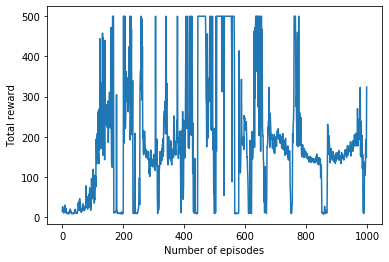

In [6]:
###get statistical results

plt.plot(G_array)
plt.xlabel('Number of episodes')
plt.ylabel('Total reward')
plt.show()

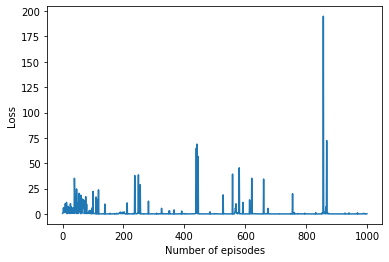

In [7]:
plt.plot(loss_array)
plt.xlabel('Number of episodes')
plt.ylabel('Loss')
plt.show()